 # HR Employee Prediction (i.e. whether they leave the company or continue to work) 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Loading Data

In [7]:
data=pd.read_csv('./hr-data.csv')
display(data)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Select Left data from the column

In [10]:
left=data[data.left==1]
print("No. of employees left the company = ",left.shape[0])

No. of employees left the company =  3571


# Select Retained data from the column

In [11]:
retained=data[data.left==0]
print("No. of employees retained in the company = ",retained.shape[0])

No. of employees retained in the company =  11428


# Group Data on Left base value

In [12]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Bar Chart Showing Impact of Employees Salaries on Retention

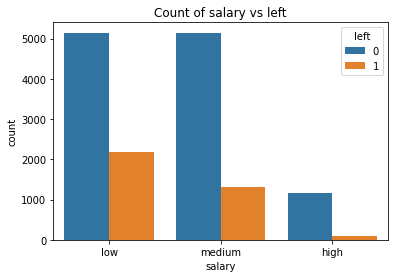

In [13]:
plt.title('Count of salary vs left')
sns.countplot(data=data, x='salary', hue='left');


# Bar Chart Showing Correlation between department and employee retention

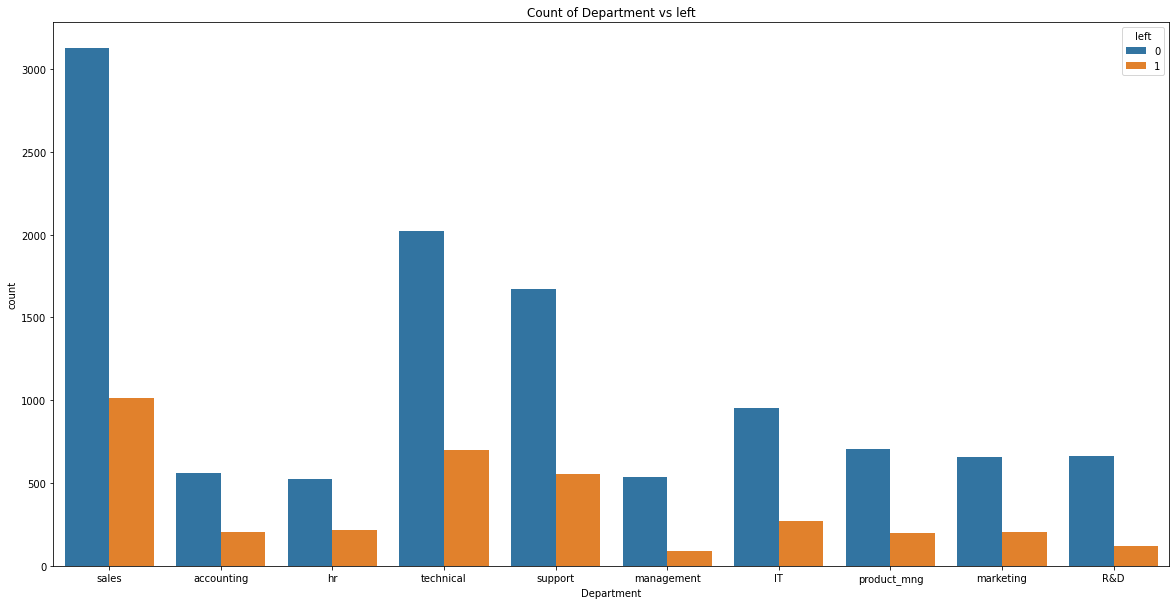

In [14]:
plt.figure(figsize=(20,10))
plt.title('Count of Department vs left')
sns.countplot(data=data, x='Department', hue='left');

<AxesSubplot:title={'center':'Count of number project vs time spend company vs left'}, xlabel='number_project', ylabel='years'>

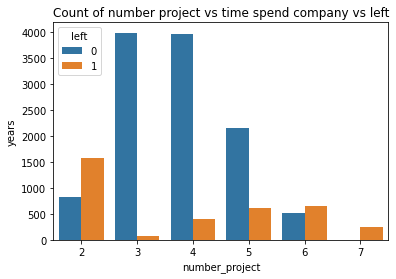

In [15]:
plt.title('Count of number project vs time spend company vs left')
c=sns.countplot(data=data, x='number_project', hue='left');
c.set_ylabel("years")
c

# Correlation

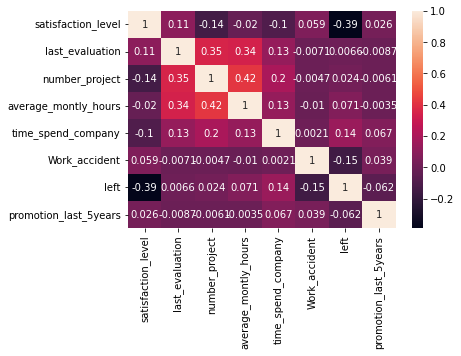

In [16]:
sns.heatmap(data=data.corr(),annot=True);

# Selecting Variables Which Impact Most on Employee Retention 

In [17]:
sel_data = data[['satisfaction_level','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary']]
sel_data.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,157,3,0,0,low
1,0.80,262,6,0,0,medium
2,0.11,272,4,0,0,medium
3,0.72,223,5,0,0,low
4,0.37,159,3,0,0,low


# Encoding Salary Variable 

In [18]:
dummies = pd.get_dummies(sel_data.salary)
data_encoded = pd.concat([sel_data,dummies],axis='columns')
data_encoded=data_encoded.drop(['salary'],axis=1)

# Assign Data to X

In [19]:
X = data_encoded
X.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,157,3,0,0,0,1,0
1,0.80,262,6,0,0,0,0,1
2,0.11,272,4,0,0,0,0,1
3,0.72,223,5,0,0,0,1,0
4,0.37,159,3,0,0,0,1,0


# Left data assign to y 

In [20]:
y = data.left

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

# Logistic Regression Model For Prediction

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
linear_model = LogisticRegression()
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Train Model

In [23]:
linear_model.fit(X_train, y_train)
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

/home/zsahildhillon/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

# Prediction

In [26]:
linear_model.predict(X_test)
# performing predictions on the test dataset
y_pred=clf.predict(X_test)


# Model Score

In [27]:
from sklearn import metrics 
print("Accuracy Of The Model Using Linear Regression : ",linear_model.score(X_test,y_test))
print("ACCURACY OF THE MODEL Using Random Forest Classifier : ", metrics.accuracy_score(y_test, y_pred))

Accuracy Of The Model Using Linear Regression :  0.7662857142857142
ACCURACY OF THE MODEL Using Random Forest Classifier :  0.9720952380952381


# Converting to Pickle model

In [29]:
pickle.dump(clf,open('hr_rf_model.pkl','wb'))
model=pickle.load(open('hr_rf_model.pkl','rb'))